In [62]:
% matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

# Part A (Fixed Architecture and Variances)

In [1]:
def feedforward(architecture, variancew, variancetheta, input_dim):
    # feedforward implements a flexible feedforward neural network to study the decision boundary complexity.
    # Input: 
    # architecture - a list defining the number of neurons in each layer
    # variancew - variance of weights chosen in the model
    # variancetheta - variance of biases chosen in the model
    # input_dim - dimension of input data
    # Output:
    # Plots of data with color representing how it would classify 
    # to give a visual of the decision boundary of the neural network
    reps = 4
    outputs = {}
    for num in range(reps):
        T = 1000  # number of input data samples
        var_weights = variancew  # variance of weights
        var_thresholds = variancetheta  # variance of thresholds
        architecture = architecture  # dimension of each layer
        input_data = np.random.uniform(-1, 1, input_dim*T)  # input drawn from normal distribution
        input_data = np.reshape(input_data, (input_dim, 1000))
        # generate weight and bias matrices
        weights = {}
        biases = {}
        for layer in range(len(architecture)-1):
            sizew = (architecture[layer+1], architecture[layer])
            sizeb = (architecture[layer+1], 1)
            W = np.random.normal(0, np.sqrt(var_weights), sizew)
            b = np.random.normal(0, np.sqrt(var_thresholds), sizeb)
            weights["W" + str(layer+1)] = W
            biases["b" + str(layer+1)] = b
        # feedforward
        x = input_data
        for layer in range(len(architecture)-1):
            w = weights["W" + str(layer+1)]
            b = biases["b" + str(layer+1)]
            z = np.dot(w, x) - b
            a = np.tanh(z)
            x = a
        color = x
        outputs["x" + str(num+1)] = input_data[0, :]
        outputs["y" + str(num+1)] = input_data[1, :]
        outputs["color" + str(num+1)] = color.ravel()

    # Make nice plots of data and decision boundary
    fig, axes = plt.subplots(2, 2, figsize=(9, 9), sharex=True, sharey=True)

    im1 = axes[0, 0].scatter(outputs["x1"], outputs["y1"], c=outputs["color1"], cmap="RdBu")
    plt.colorbar(im1, ax=axes[0, 0])
    im2 = axes[0, 1].scatter(outputs["x2"], outputs["y2"], c=outputs["color2"], cmap="RdBu")
    plt.colorbar(im2, ax=axes[0, 1])
    im3 = axes[1, 0].scatter(outputs["x3"], outputs["y3"], c=outputs["color3"], cmap="RdBu")
    plt.colorbar(im3, ax=axes[1, 0])
    im4 = axes[1, 1].scatter(outputs["x4"], outputs["y4"], c=outputs["color4"], cmap="RdBu")
    plt.colorbar(im4, ax=axes[1, 1])
    fig.suptitle("Architecture: " + str(architecture) + 
                 " Variance of W and Theta:" + 
              str(variancew) + ", " + str(variancetheta) + 
              " Input Dimension of Data: " + str(input_dim))
    plt.show()

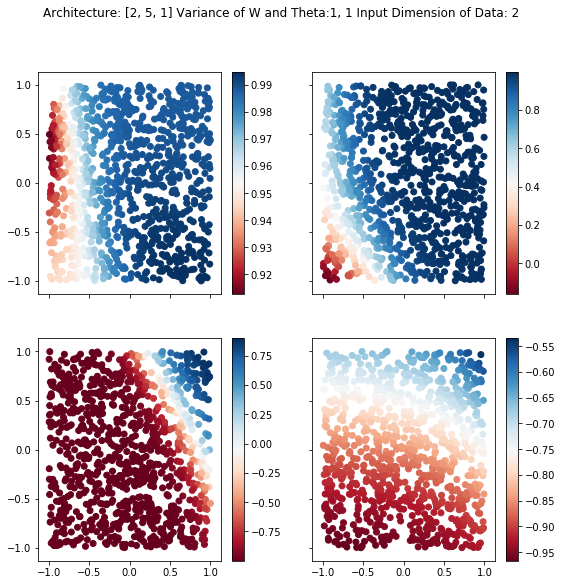

In [10]:
# simple 3 layer NN with 5 hidden neurons, variances are 1 and input dimension is 2
feedforward([2, 5, 1], 1, 1, 2)

# Part A (W and Theta changing)

# Change Variances together

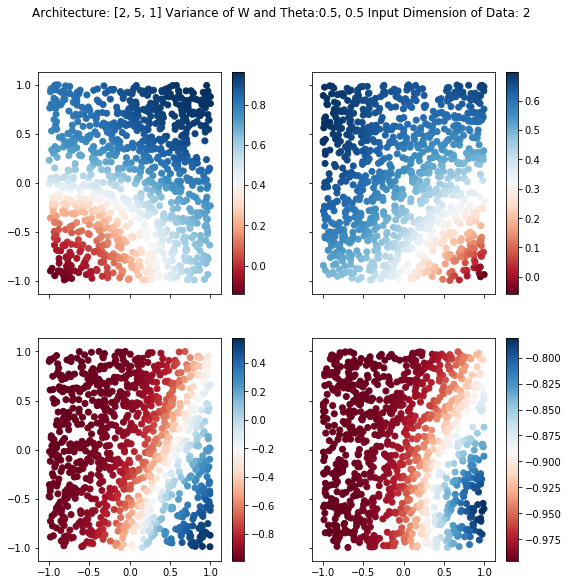

In [12]:
feedforward([2, 5, 1], 0.5, 0.5, 2)

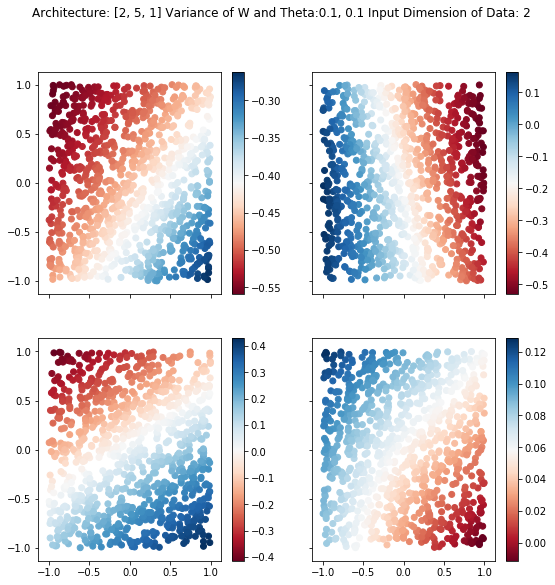

In [13]:
feedforward([2, 5, 1], 0.1, 0.1, 2)

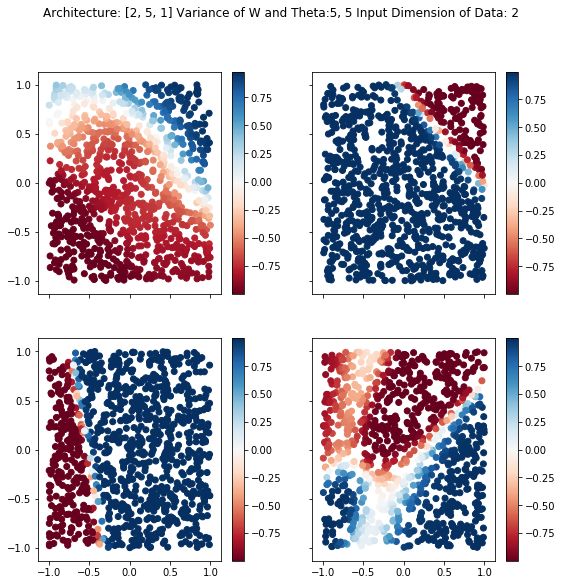

In [14]:
feedforward([2, 5, 1], 5, 5, 2)

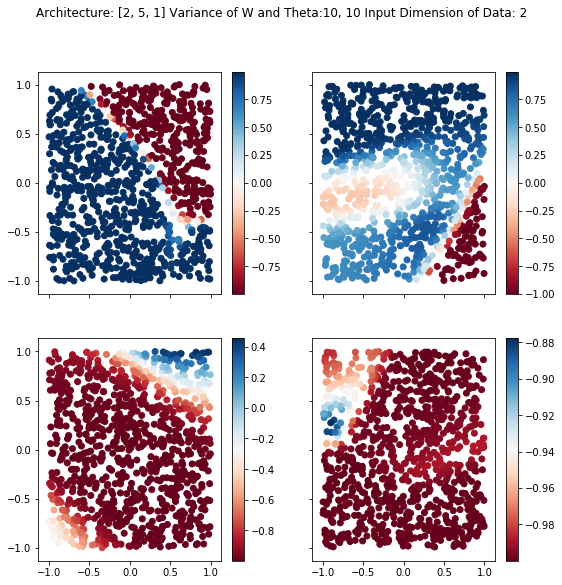

In [15]:
feedforward([2, 5, 1], 10, 10, 2)

In [ ]:
# Seems like a higher variance causes more chaotic decision boundaries (less linear)

# Keep one at 1 and Change the Other

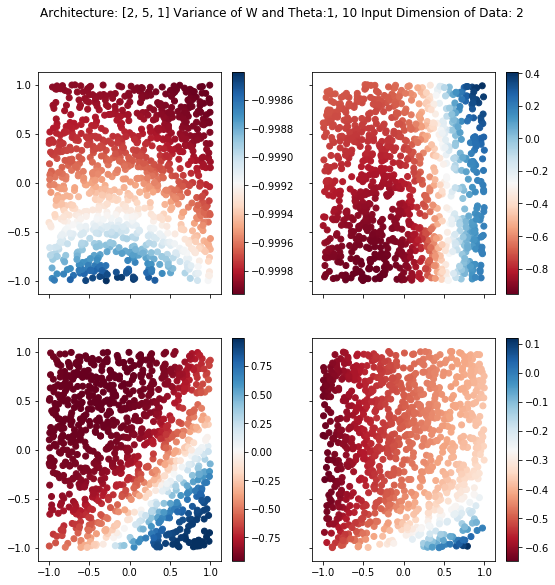

In [30]:
feedforward([2, 5, 1], 1, 10, 2)

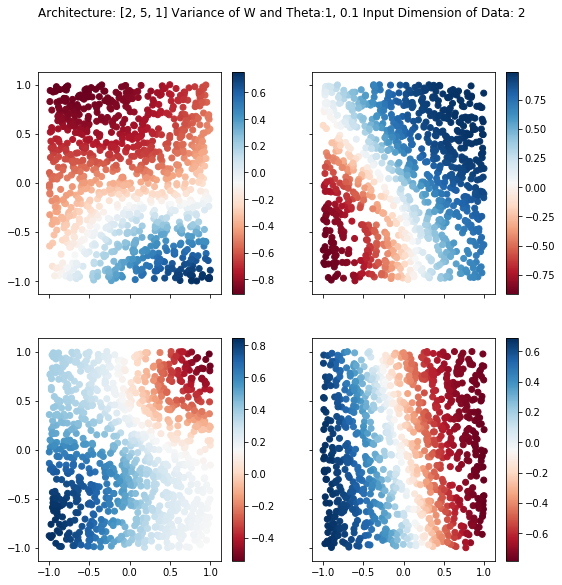

In [29]:
feedforward([2, 5, 1], 1, 0.1, 2)

In [ ]:
# Changing variance of theta changes where the decision boundary is located

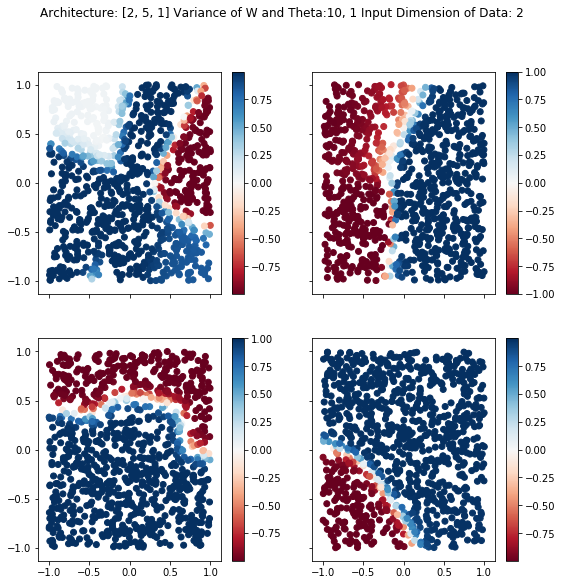

In [34]:
feedforward([2, 5, 1], 10, 1, 2)

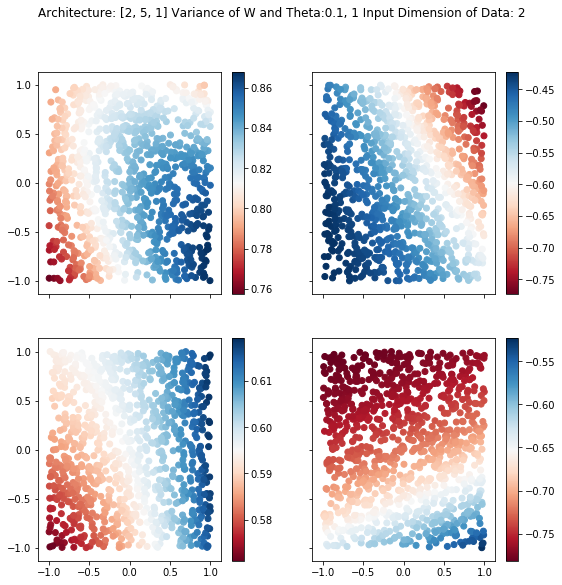

In [27]:
feedforward([2, 5, 1], 0.1, 1, 2)

In [ ]:
# Changing variance of W changes decision boundary shape

# Part B Change the Network

# Lets Keep it 3 layer but increase neuron number first

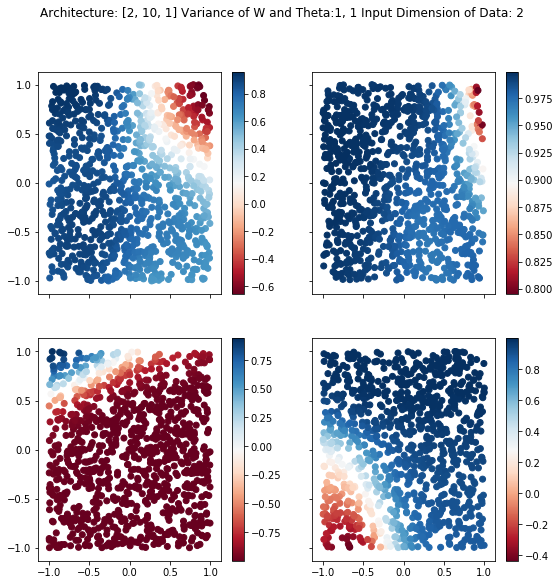

In [35]:
feedforward([2, 10, 1], 1, 1, 2)

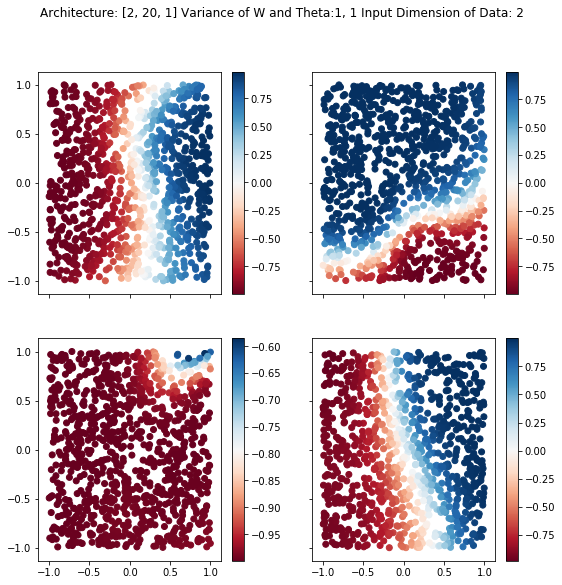

In [36]:
feedforward([2, 20, 1], 1, 1, 2)

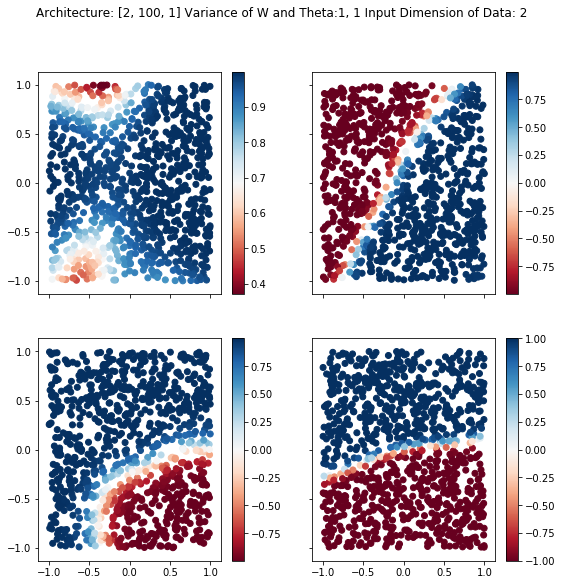

In [37]:
feedforward([2, 100, 1], 1, 1, 2)

In [38]:
# again neuron number influences curvature of decision boundary
# As you increase neuron number you can approximate more 
# complicatd functions with more curvature

# Keep number of neurons same but increase layers

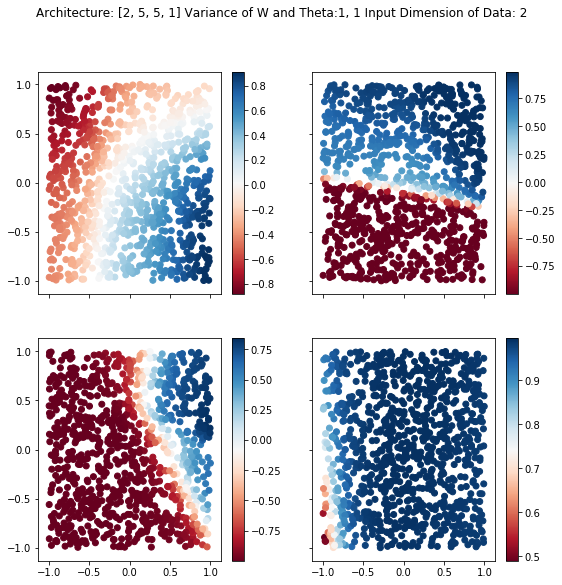

In [39]:
feedforward([2, 5, 5, 1], 1, 1, 2)

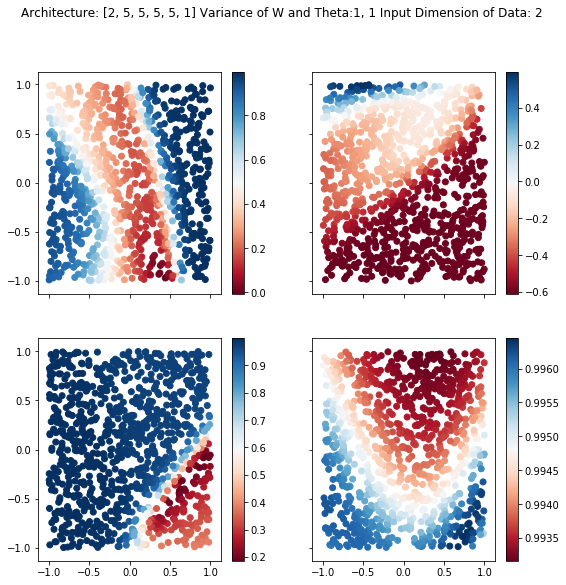

In [40]:
feedforward([2, 5, 5, 5, 5, 1], 1, 1, 2)

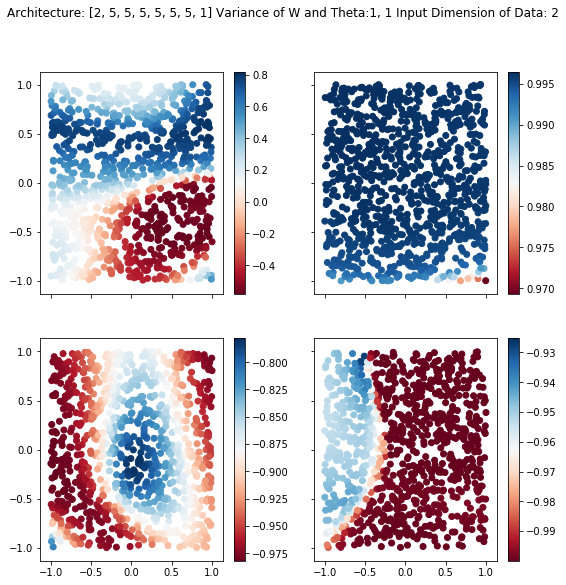

In [42]:
feedforward([2, 5, 5, 5, 5, 5, 5, 1], 1, 1, 2)

In [43]:
# Xaq mentioned in class that adding layers allows you to approximate 
# more complicated functions without needing to increase the number 
# of neurons to infinity, so again adding layers allows more complex 
# decision boundaries but with less overall neurons

# Mix of neurons and layers

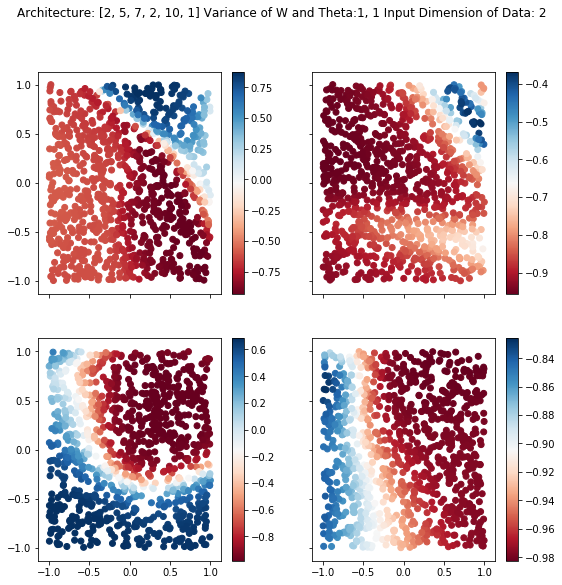

In [44]:
feedforward([2, 5, 7, 2, 10, 1], 1, 1, 2)

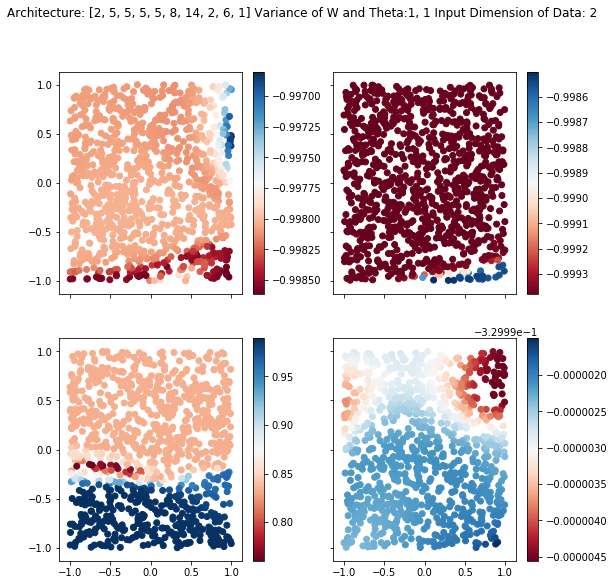

In [45]:
feedforward([2, 5, 5, 5, 5, 8, 14, 2, 6, 1], 1, 1, 2)

# Part C 


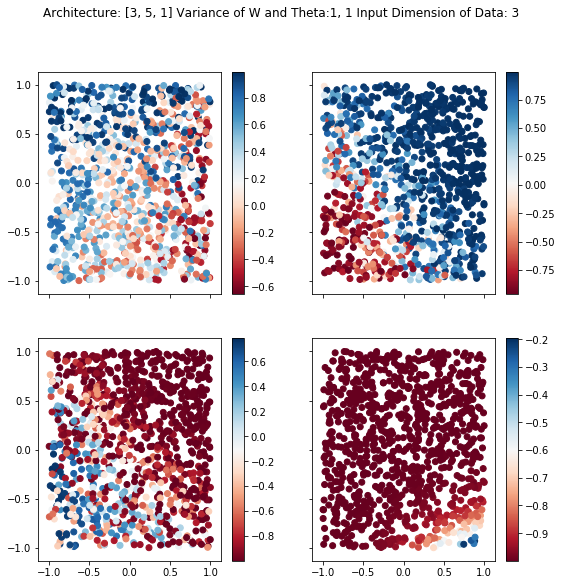

In [47]:
feedforward([3, 5, 1], 1, 1, 3)

In [48]:
# So whats happening here is that the decision boundary is now in 3D
# But we are plotting only a 2D cross section  so we get a mix of blue and red
# I will prove this by plotting it in 3D

In [66]:
def feedforward3(architecture, variancew, variancetheta, input_dim):
    output = {}
    T = 1000  # number of input data samples
    var_weights = variancew  # variance of weights
    var_thresholds = variancetheta  # variance of thresholds
    architecture = architecture  # dimension of each layer
    input_data = np.random.uniform(-1, 1, input_dim*T)  # input drawn from normal distribution
    input_data = np.reshape(input_data, (input_dim, 1000))
    # generate weight and bias matrices
    weights = {}
    biases = {}
    for layer in range(len(architecture)-1):
        sizew = (architecture[layer+1], architecture[layer])
        sizeb = (architecture[layer+1], 1)
        W = np.random.normal(0, np.sqrt(var_weights), sizew)
        b = np.random.normal(0, np.sqrt(var_thresholds), sizeb)
        weights["W" + str(layer+1)] = W
        biases["b" + str(layer+1)] = b
    # feedforward
    x = input_data
    for layer in range(len(architecture)-1):
        w = weights["W" + str(layer+1)]
        b = biases["b" + str(layer+1)]
        z = np.dot(w, x) - b
        a = np.tanh(z)
        x = a
    color = x
    outputs["x" + str(num+1)] = input_data[0, :]
    outputs["y" + str(num+1)] = input_data[1, :]
    outputs["z" + str(num+1)] = input_data[2, :]
    outputs["color" + str(num+1)] = color.ravel()

# Make nice plots
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(input_data[0, :], input_data[1, :], input_data[2, :], c=color.ravel(), cmap="RdBu")
    plt.title("Architecture: " + str(architecture) + " Variance of W and Theta:" + 
              str(variancew) + ", " + str(variancetheta) + 
              " Input Dimension of Data: " + str(input_dim))
    plt.show()

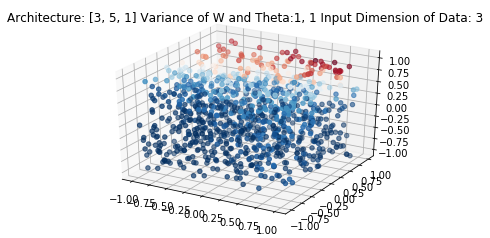

In [67]:
from mpl_toolkits.mplot3d import Axes3D
feedforward3([3, 5, 1], 1, 1, 3)

In [68]:
# So now it looks the same as before when viewed in 3d like I thought